In [1]:
from spectro_tomography import *

Text(0.5, 1.0, 'state 2')

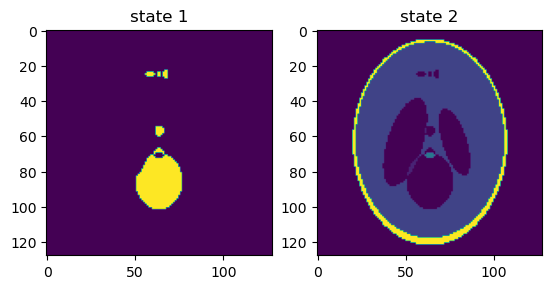

In [2]:
# generate a simple pahntom object containing two states
obj_sz = 128
num_angle = 181
V = shepp_logan(obj_sz)
ind1 = np.where(np.abs(V-0.3)<0.01)
mask1 = np.zeros(V.shape)
mask1[ind1] = 1

ind2 = np.where(np.abs(V-0.3)>=0.01)
mask2 = np.zeros(V.shape)
mask2[ind2] = 1

im1 = V*mask1
im2 = V*mask2

plt.subplot(121)
plt.title('state 1')
plt.imshow(im1)
plt.subplot(122)
plt.imshow(im2)
plt.title('state 2')

data_size = 23168, rec_size = 16384


  0%|          | 0/100 [00:00<?, ?it/s]

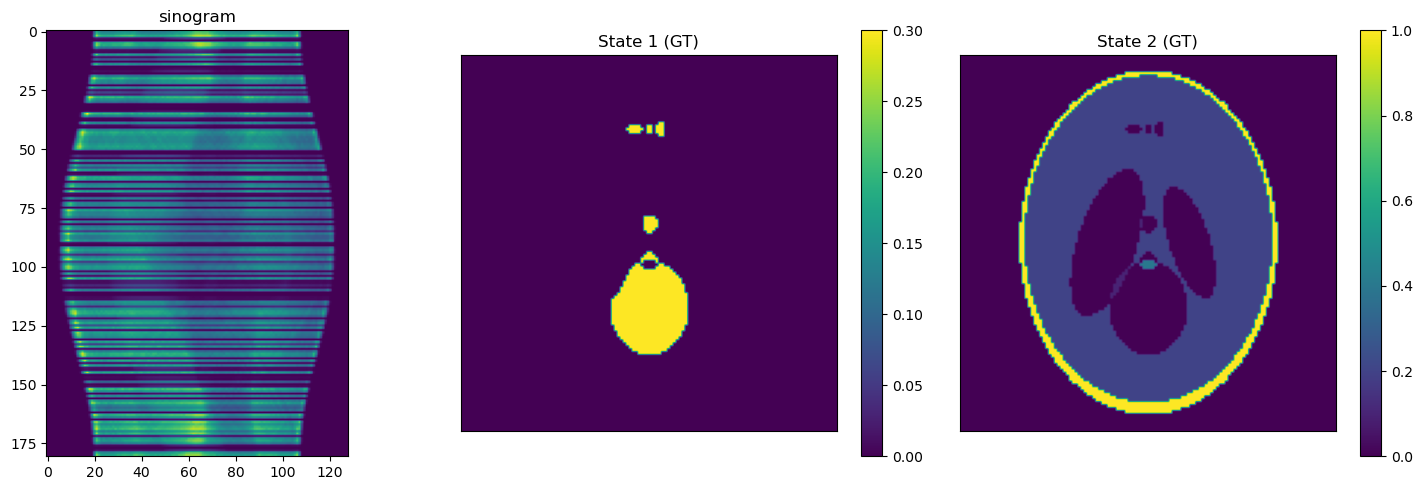

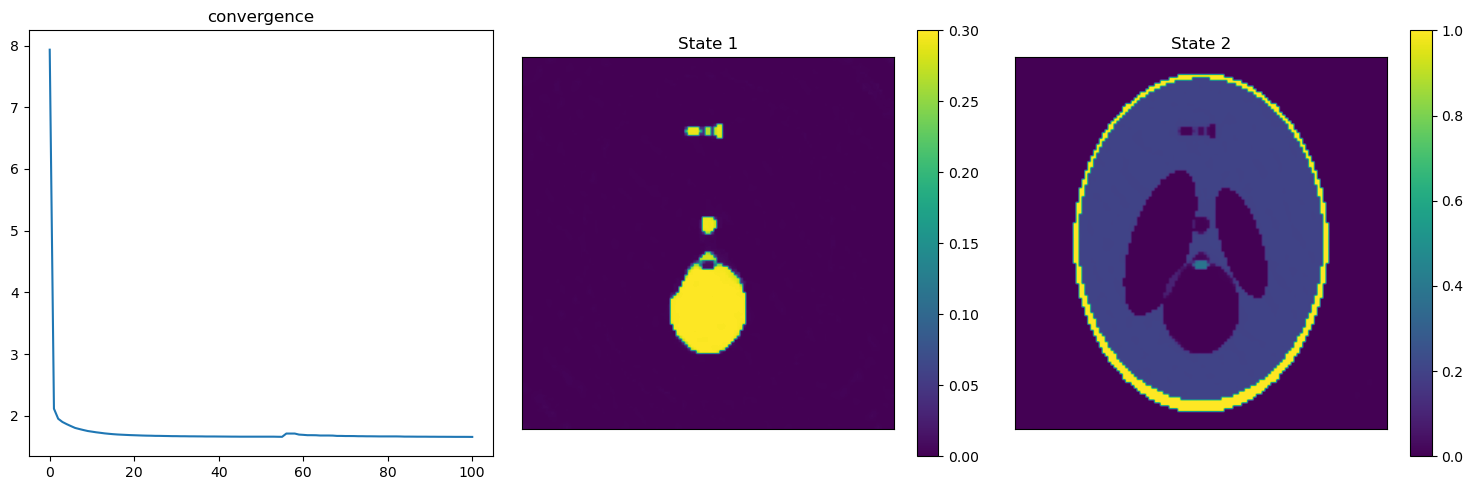

In [5]:
obj_row, obj_col = np.shape(V) 
# loading reference spectra
ref_spectra = np.loadtxt('fe0_fe3_ref.txt')
used_spect = np.abs(ref_spectra[:,1:3])


# generate the list of angle-energy pairs and the codebook 
# that records the relative intensity change of each state based on reference spectra
# 'uniform-random' refers to uniform angular step and random energy selection
# other options used in the paper are 'uniform-interlaced' and 'uniform-segmented'

angle, codebook, ind = generate_plan(used_spect,[0,np.pi],num_angle,'uniform-random')
angle = np.linspace(0,np.pi,num_angle)
sino = []


for i in range (len(angle)):
    proj_geom = astra.create_proj_geom('parallel',1.0,obj_col,angle[i])
    vol_geom = astra.create_vol_geom(obj_row,obj_col)
    proj_id = astra.create_projector('linear',proj_geom,vol_geom)
    [sigogram_id, sinogram] = astra.create_sino(im1*codebook[i,0]+im2*codebook[i,1],proj_id)
    sino.append(sinogram)
sino = np.squeeze(np.array(sino))
# sino_noise=np.random.poisson(np.array(sino*1e3/np.max(sino),dtype='int'))/1e3

# use random initialization
x_init = []
x_init.append(np.random.rand(obj_row,obj_col))
x_init.append(np.random.rand(obj_row,obj_col))

# note: computation is not parallerized and can take up to a few minutes 
rec,err = multistate_tomo_joint_TV(sino,angle,0,\
                                   [obj_row,obj_col],codebook,\
                                   0.05,1,100,x0=x_init,seq_save=True)

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(sino)
plt.title('sinogram')
plt.subplot(132)
plt.imshow(im1,clim=[0,0.3])
plt.colorbar()
plt.title('State 1 (GT)')
plt.xticks([])
plt.yticks([])
plt.subplot(133)
plt.imshow(im2,clim=[0,1])
plt.colorbar()
plt.title('State 2 (GT)')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(np.log10(err))
plt.title('convergence')
plt.subplot(132)
plt.imshow(rec[-1][0],clim=[0,0.3])
plt.colorbar()
plt.title('State 1')
plt.xticks([])
plt.yticks([])
plt.subplot(133)
plt.imshow(rec[-1][1],clim=[0,1])
plt.colorbar()
plt.title('State 2')
plt.xticks([])
plt.yticks([])
plt.tight_layout()


data_size = 15488, rec_size = 16384


  0%|          | 0/300 [00:00<?, ?it/s]

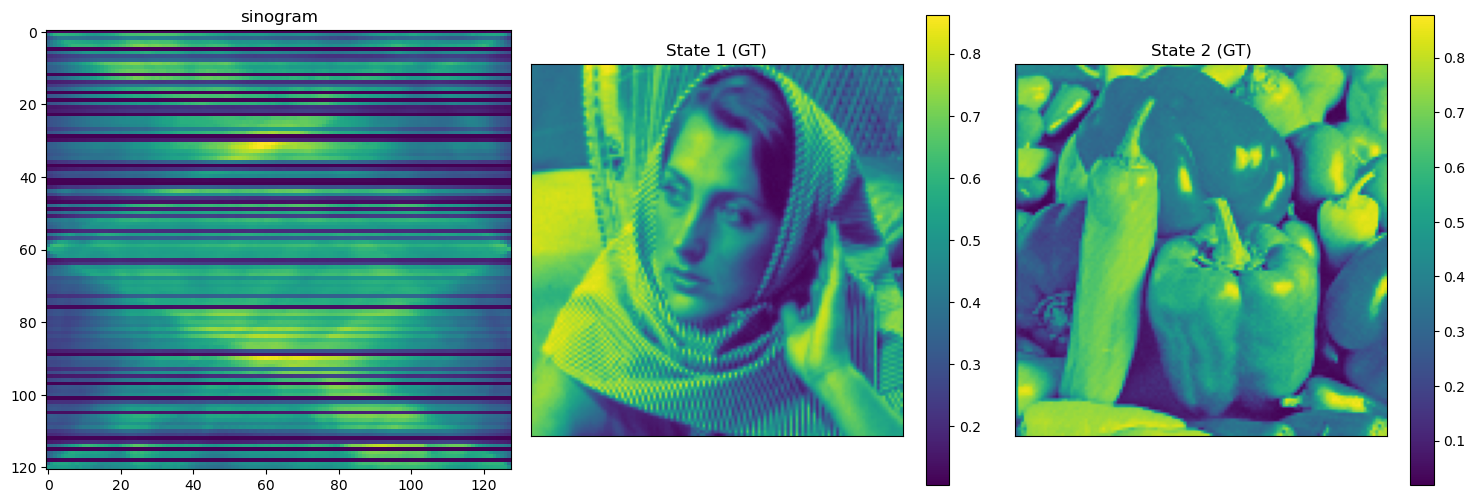

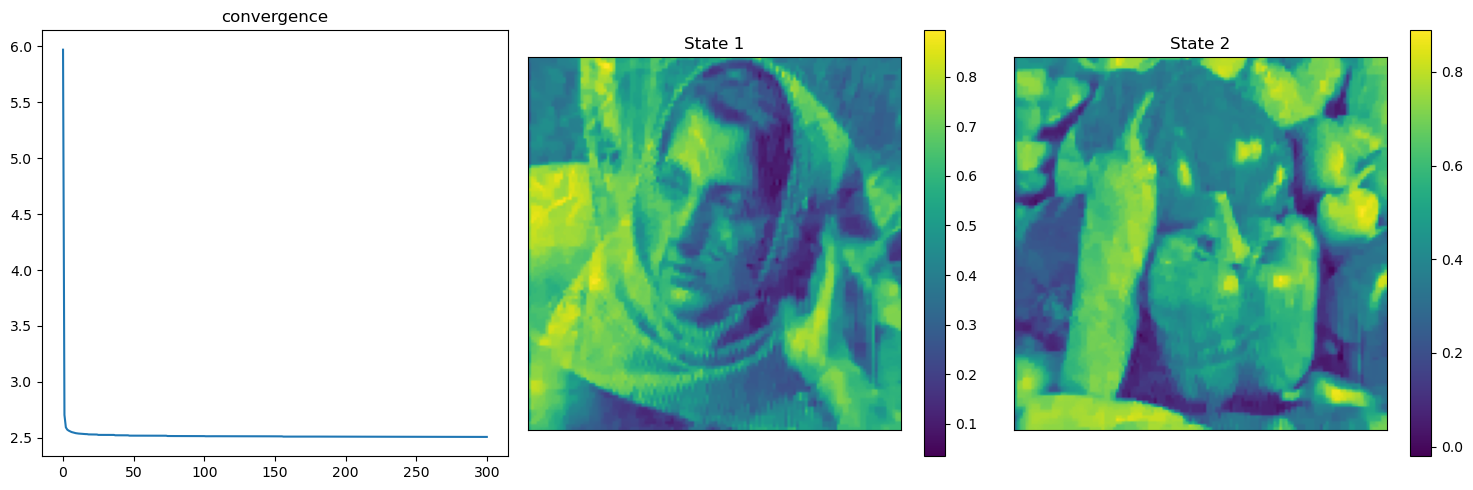

In [18]:
# object with complex patterns  

num_angle = 121

im1 = tf.imread('barbara_128.tif')/255.0
im2 = tf.imread('peppers_128.tif')/255.0
obj_row, obj_col = np.shape(V) 

ref_spectra = np.loadtxt('fe0_fe3_ref.txt')
used_spect = np.abs(ref_spectra[:,1:3])


# generate the list of angle-energy pairs and the codebook 
# that records the relative intensity change of each state based on reference spectra
# 'uniform-random' refers to uniform angular step and random energy selection
# other options used in the paper are 'uniform-interlaced' and 'uniform-segmented'

angle, codebook, ind = generate_plan(used_spect,[0,np.pi],num_angle,'uniform-random')
angle = np.linspace(0,np.pi,num_angle)
sino = []

for i in range (len(angle)):
    proj_geom = astra.create_proj_geom('parallel',1.0,obj_col,angle[i])
    vol_geom = astra.create_vol_geom(obj_row,obj_col)
    proj_id = astra.create_projector('linear',proj_geom,vol_geom)
    [sigogram_id, sinogram] = astra.create_sino(im1*codebook[i,0]+im2*codebook[i,1],proj_id)
    sino.append(sinogram)
sino = np.squeeze(np.array(sino))
# sino_noise=np.random.poisson(np.array(sino*1e3/np.max(sino),dtype='int'))/1e3

# random initialization
x_init = []
x_init.append(np.random.rand(obj_row,obj_col))
x_init.append(np.random.rand(obj_row,obj_col))

rec,err = multistate_tomo_joint_TV(sino,angle,0,\
                                   [obj_row,obj_col],codebook,\
                                   0.15,1,300,x0=x_init,seq_save=True)
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(sino)
plt.title('sinogram')
plt.subplot(132)
plt.imshow(im1)
plt.colorbar()
plt.title('State 1 (GT)')
plt.xticks([])
plt.yticks([])
plt.subplot(133)
plt.imshow(im2)
plt.colorbar()
plt.title('State 2 (GT)')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(np.log10(err))
plt.title('convergence')
plt.subplot(132)
plt.imshow(rec[-1][0])
plt.colorbar()
plt.title('State 1')
plt.xticks([])
plt.yticks([])
plt.subplot(133)
plt.imshow(rec[-1][1])
plt.colorbar()
plt.title('State 2')
plt.xticks([])
plt.yticks([])
plt.tight_layout()


data_size = 15488, rec_size = 16384


  0%|          | 0/300 [00:00<?, ?it/s]

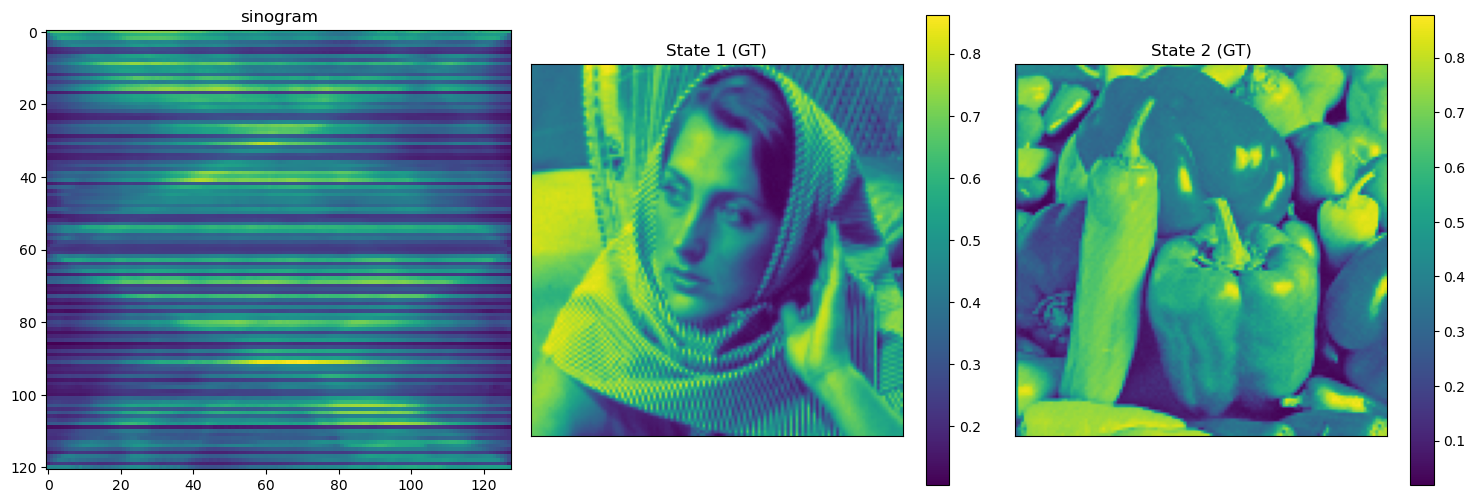

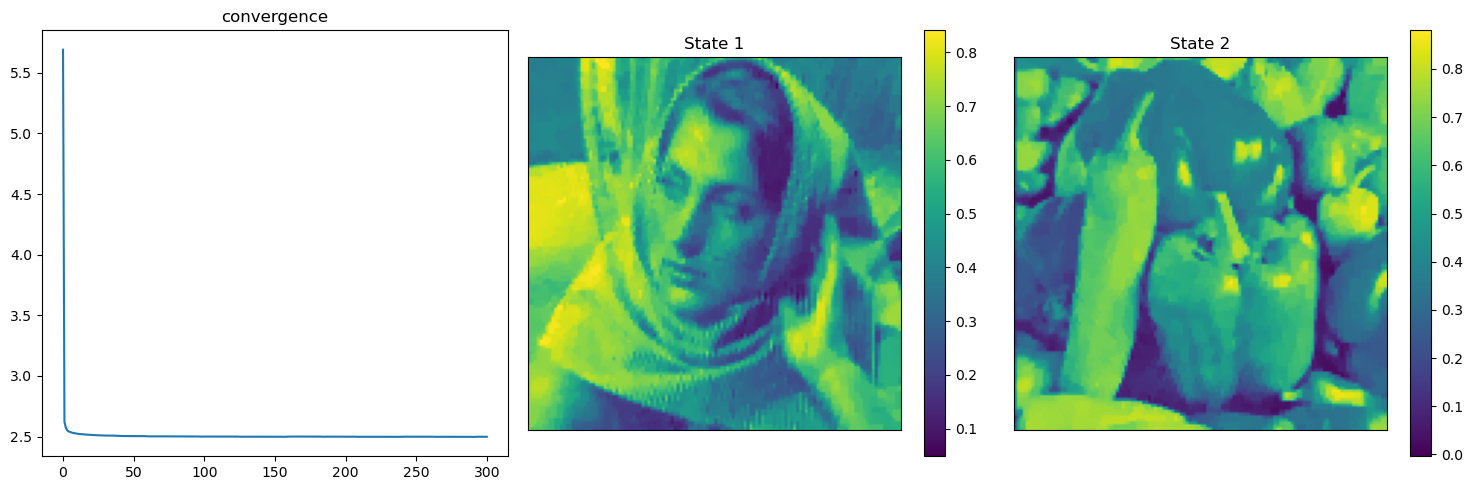

In [25]:
# object with complex patterns  
# hypothetical spectra that are random numbers and least correlated

num_angle = 121

im1 = tf.imread('barbara_128.tif')/255.0
im2 = tf.imread('peppers_128.tif')/255.0
obj_row, obj_col = np.shape(V) 


used_spect = np.concatenate((np.random.rand(52).reshape((-1,1)),np.random.rand(52).reshape((-1,1))),1)


# generate the list of angle-energy pairs and the codebook 
# that records the relative intensity change of each state based on reference spectra
# 'uniform-random' refers to uniform angular step and random energy selection
# other options used in the paper are 'uniform-interlaced' and 'uniform-segmented'

angle, codebook, ind = generate_plan(used_spect,[0,np.pi],num_angle,'uniform-random')
angle = np.linspace(0,np.pi,num_angle)
sino = []

for i in range (len(angle)):
    proj_geom = astra.create_proj_geom('parallel',1.0,obj_col,angle[i])
    vol_geom = astra.create_vol_geom(obj_row,obj_col)
    proj_id = astra.create_projector('linear',proj_geom,vol_geom)
    [sigogram_id, sinogram] = astra.create_sino(im1*codebook[i,0]+im2*codebook[i,1],proj_id)
    sino.append(sinogram)
sino = np.squeeze(np.array(sino))
# sino_noise=np.random.poisson(np.array(sino*1e3/np.max(sino),dtype='int'))/1e3

# random initialization
x_init = []
x_init.append(np.random.rand(obj_row,obj_col))
x_init.append(np.random.rand(obj_row,obj_col))

rec,err = multistate_tomo_joint_TV(sino,angle,0,\
                                   [obj_row,obj_col],codebook,\
                                   0.15,1,300,x0=x_init,seq_save=True)
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(sino)
plt.title('sinogram')
plt.subplot(132)
plt.imshow(im1)
plt.colorbar()
plt.title('State 1 (GT)')
plt.xticks([])
plt.yticks([])
plt.subplot(133)
plt.imshow(im2)
plt.colorbar()
plt.title('State 2 (GT)')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(np.log10(err))
plt.title('convergence')
plt.subplot(132)
plt.imshow(rec[-1][0])
plt.colorbar()
plt.title('State 1')
plt.xticks([])
plt.yticks([])
plt.subplot(133)
plt.imshow(rec[-1][1])
plt.colorbar()
plt.title('State 2')
plt.xticks([])
plt.yticks([])
plt.tight_layout()


data_size = 23168, rec_size = 16384


  0%|          | 0/300 [00:00<?, ?it/s]

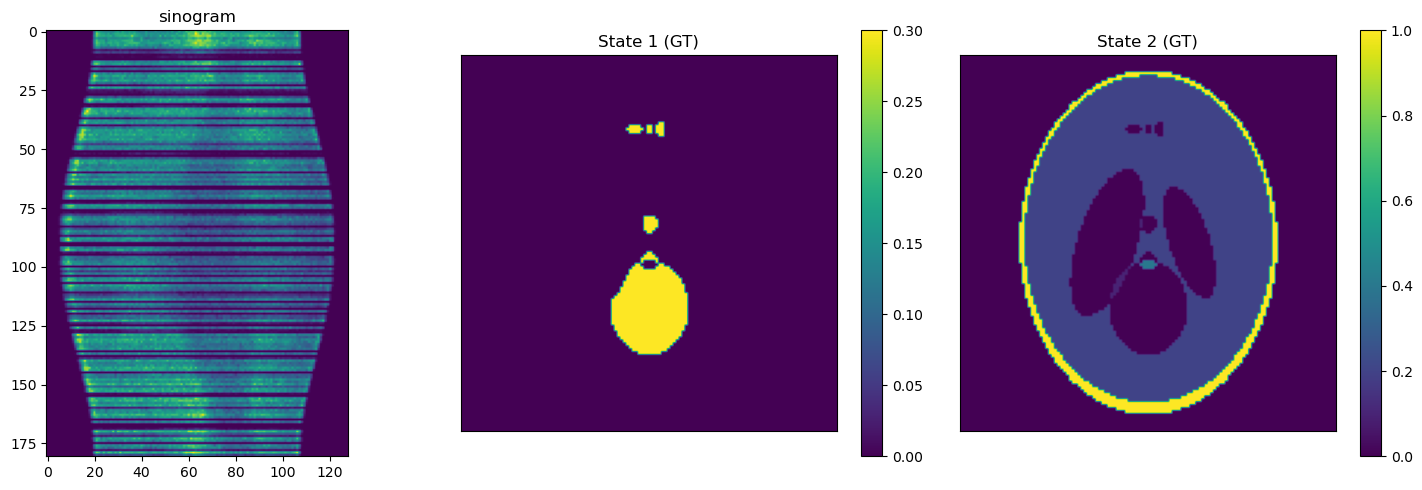

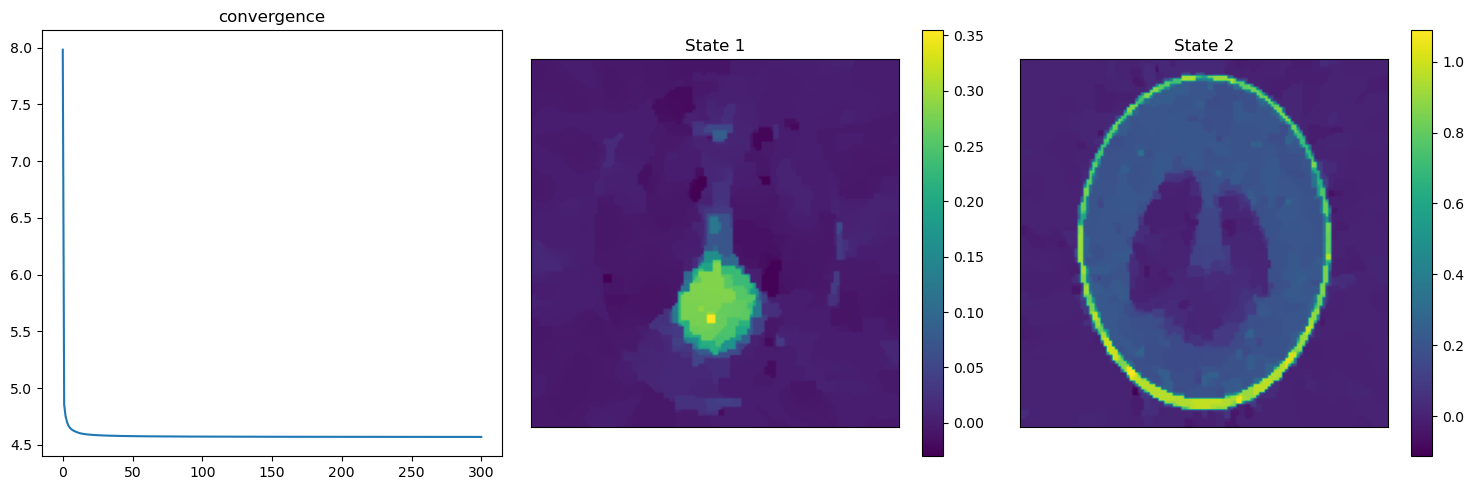

In [47]:
# add noise to the sinogram
# For very noisy data, mu1 and mu2 need to be tuned more for the best result

ind1 = np.where(np.abs(V-0.3)<0.01)
mask1 = np.zeros(V.shape)
mask1[ind1] = 1

ind2 = np.where(np.abs(V-0.3)>=0.01)
mask2 = np.zeros(V.shape)
mask2[ind2] = 1

im1 = V*mask1
im2 = V*mask2

obj_row, obj_col = np.shape(V) 
# loading reference spectra
ref_spectra = np.loadtxt('fe0_fe3_ref.txt')
used_spect = np.abs(ref_spectra[:,1:3])

num_angle = 181

# generate the list of angle-energy pairs and the codebook 
# that records the relative intensity change of each state based on reference spectra
# 'uniform-random' refers to uniform angular step and random energy selection
# other options used in the paper are 'uniform-interlaced' and 'uniform-segmented'

angle, codebook, ind = generate_plan(used_spect,[0,np.pi],num_angle,'uniform-random')
angle = np.linspace(0,np.pi,num_angle)
sino = []


for i in range (len(angle)):
    proj_geom = astra.create_proj_geom('parallel',1.0,obj_col,angle[i])
    vol_geom = astra.create_vol_geom(obj_row,obj_col)
    proj_id = astra.create_projector('linear',proj_geom,vol_geom)
    [sigogram_id, sinogram] = astra.create_sino(im1*codebook[i,0]+im2*codebook[i,1],proj_id)
    sino.append(sinogram)
sino = np.squeeze(np.array(sino))
maxVal = sino.max()
sino_noise=np.random.poisson(np.array(sino*2e2/maxVal,dtype='int'))*maxVal/2e2

# use random initialization
x_init = []
x_init.append(np.random.rand(obj_row,obj_col))
x_init.append(np.random.rand(obj_row,obj_col))

# note: computation is not parallerized and can take up to a few minutes 
rec,err = multistate_tomo_joint_TV(sino_noise,angle,0,\
                                   [obj_row,obj_col],codebook,\
                                   15,25,300,x0=x_init,seq_save=True)

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(sino_noise)
plt.title('sinogram')
plt.subplot(132)
plt.imshow(im1)
plt.colorbar()
plt.title('State 1 (GT)')
plt.xticks([])
plt.yticks([])
plt.subplot(133)
plt.imshow(im2)
plt.colorbar()
plt.title('State 2 (GT)')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(np.log10(err))
plt.title('convergence')
plt.subplot(132)
plt.imshow(rec[-1][0])
plt.colorbar()
plt.title('State 1')
plt.xticks([])
plt.yticks([])
plt.subplot(133)
plt.imshow(rec[-1][1])
plt.colorbar()
plt.title('State 2')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
